<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/homeworks/hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Tarea N°01

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Alexei Arenas Bahamondes

* __Rol__: 201910513-2

2.- Debes _subir_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
   - Soluciones
   - Código
   - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.-  Imagenception

Desde [Wikipedia](https://es.wikipedia.org/wiki/RGB), __RGB__ (sigla en inglés de *red*, *green*, *blue*) es un modelo de color basado en la síntesis aditiva, con el que es posible representar un color mediante la mezcla por adición de los tres colores de luz primarios. El modelo de color RGB no define por sí mismo lo que significa exactamente rojo, verde o azul, por lo que los mismos valores RGB pueden mostrar colores notablemente diferentes en distintos dispositivos que usen este modelo de color. Aunque utilicen un mismo modelo de color, sus espacios de color pueden variar considerablemente.

Para indicar con qué proporción es mezclado cada color, se asigna un valor a cada uno de los colores primarios, de manera que el valor "0" significa que no interviene en la mezcla y, a medida que ese valor aumenta, se entiende que aporta más intensidad a la mezcla. Aunque el intervalo de valores podría ser cualquiera (valores reales entre 0 y 1, valores enteros entre 0 y 37, etc.), es frecuente que cada color primario se codifique con un byte (8 bits).

Así, de manera usual, la intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 y cada color es definido por un conjunto de valores escritos entre paréntesis (correspondientes a valores "R", "G" y "B") y separados por comas.

El conjunto de todos los colores también se puede representar en forma de cubo. Cada color es un punto de la superficie o del interior de éste. La escala de grises estaría situada en la diagonal que une al color blanco con el negro.

![rgb](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Avl3119color4a.svg/800px-Avl3119color4a.svg.png)

Para efectos prácticos del curso, es posible representar cada pixel de una imagen con un array de 3 dimensiones, cada valor representa a una de las capas RGB. Por lo tanto, una imagen de $n \times m$ pixeles se representa como un arreglo de dimension $(n, m , 3)$ En `Python` una de las librerías de procesamiento de imágenes más utilizada es `Pillow`.

Abrir una imagen es tan fácil como:

In [1]:
# librerias

import numpy as np
from PIL import Image

In [2]:
gatito = Image.open("images/gatito.png")

Notar que la variable anterior es de una clase específica de la librería.

In [3]:
type(gatito)

PIL.PngImagePlugin.PngImageFile

Para ver la imagen en Jupyter puedes utilizar la misma técnica que con los `pd.DataFrames`, es decir:

In [4]:
gatito

Output hidden; open in https://colab.research.google.com to view.

Para tener su representación en un array podemos utilizar el constructor `np.array` con argumento la imagen.

In [5]:
gatito_np = np.array(gatito)
print(f"Dimension de la imagen gatito: {gatito_np.shape}.\n")
print(f"Al convertir a np.ndarry el tipo de elementos es {gatito_np.dtype}.\n")
print(gatito_np)

Dimension de la imagen gatito: (2160, 1280, 3).

Al convertir a np.ndarry el tipo de elementos es uint8.

[[[179 211 215]
  [179 211 215]
  [179 209 215]
  ...
  [171 201 209]
  [171 201 209]
  [169 199 207]]

 [[181 213 217]
  [181 213 217]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [171 201 209]]

 [[179 211 215]
  [179 211 215]
  [181 211 217]
  ...
  [173 203 211]
  [173 203 211]
  [173 203 211]]

 ...

 [[125 179 190]
  [123 177 188]
  [129 183 194]
  ...
  [ 41  36  33]
  [ 43  38  35]
  [ 45  40  37]]

 [[127 181 192]
  [125 179 190]
  [127 181 192]
  ...
  [ 43  38  37]
  [ 43  38  37]
  [ 45  40  37]]

 [[125 179 190]
  [123 177 188]
  [123 177 188]
  ...
  [ 49  44  43]
  [ 45  40  37]
  [ 43  38  35]]]


### 1.- Encontrando la imagen oculta

La imagen anterior tiene una imagen oculta, el ejercicio corresponde en descifrarlo. Las instrucciones son las siguientes:

1.1 Crear una lista vacía declarada como `secret_list`.

In [6]:
secret_list = []

1.2 Iterar por cada uno de los canales RGB (`gatito_np.shape[2]`) y en cada iteración:
 * Crear un arreglo temporal llamado `secret_aux` de dos dimensiones, de la misma dimension de pixeles de la imagen `gatito` y que tenga valores enteros, `0` si el valor de la capa de `gatito_np` es par y `1` si es impar.
  - No iterar por filas y columnas.
  - Utilizar la operación módulo `%`.
  - En la i-ésima iteración de los canales la capa de `gatito_np` es `gatito_np[:, :, i]`.
        
        
 * Escalar `secret_aux` a valores 0 y 255.
    
 * Cambiar el `dtype` de `secret_aux` a `np.uint8` (utilize el méteodo `astype()`).
            
 * Agregue `secret_aux` a `secret_list`.
    
Al final de la iteración `secret_list` debe tener solo tres arreglos.

**Observación:** recuerde que puede aplicar operaciones directo a un arreglo de numpy.

In [7]:
for channel in range(gatito_np.shape[2]):
    secret_aux = (gatito_np[:, :, channel] % 2)
    secret_aux = secret_aux * 255
    secret_aux = secret_aux.astype(np.uint8)
    secret_list.append(secret_aux)

In [8]:
print(f"secret_list tiene {len(secret_list)} elementos")

secret_list tiene 3 elementos


1.3 Crear la variable `secret_np` concatenando horizontalmente los elementos de `secret_list`.

In [9]:
secret_np = np.concatenate(secret_list, axis=1)
secret_np.shape

(2160, 3840)

1.4 Crear el objeto `secret_img` utilizando el arreglo `secret_np`, asegurar que los valores estén entre 0 y 255, y que el dtype sea `np.uint8`, con el método `Image.fromarray` con argumento `mode="L"`

In [10]:
np.unique(secret_np)

array([  0, 255], dtype=uint8)

In [11]:
secret_np.dtype

dtype('uint8')

In [12]:
secret_img = Image.fromarray(secret_np, mode="L")

Ahora puedes ver el resultado!

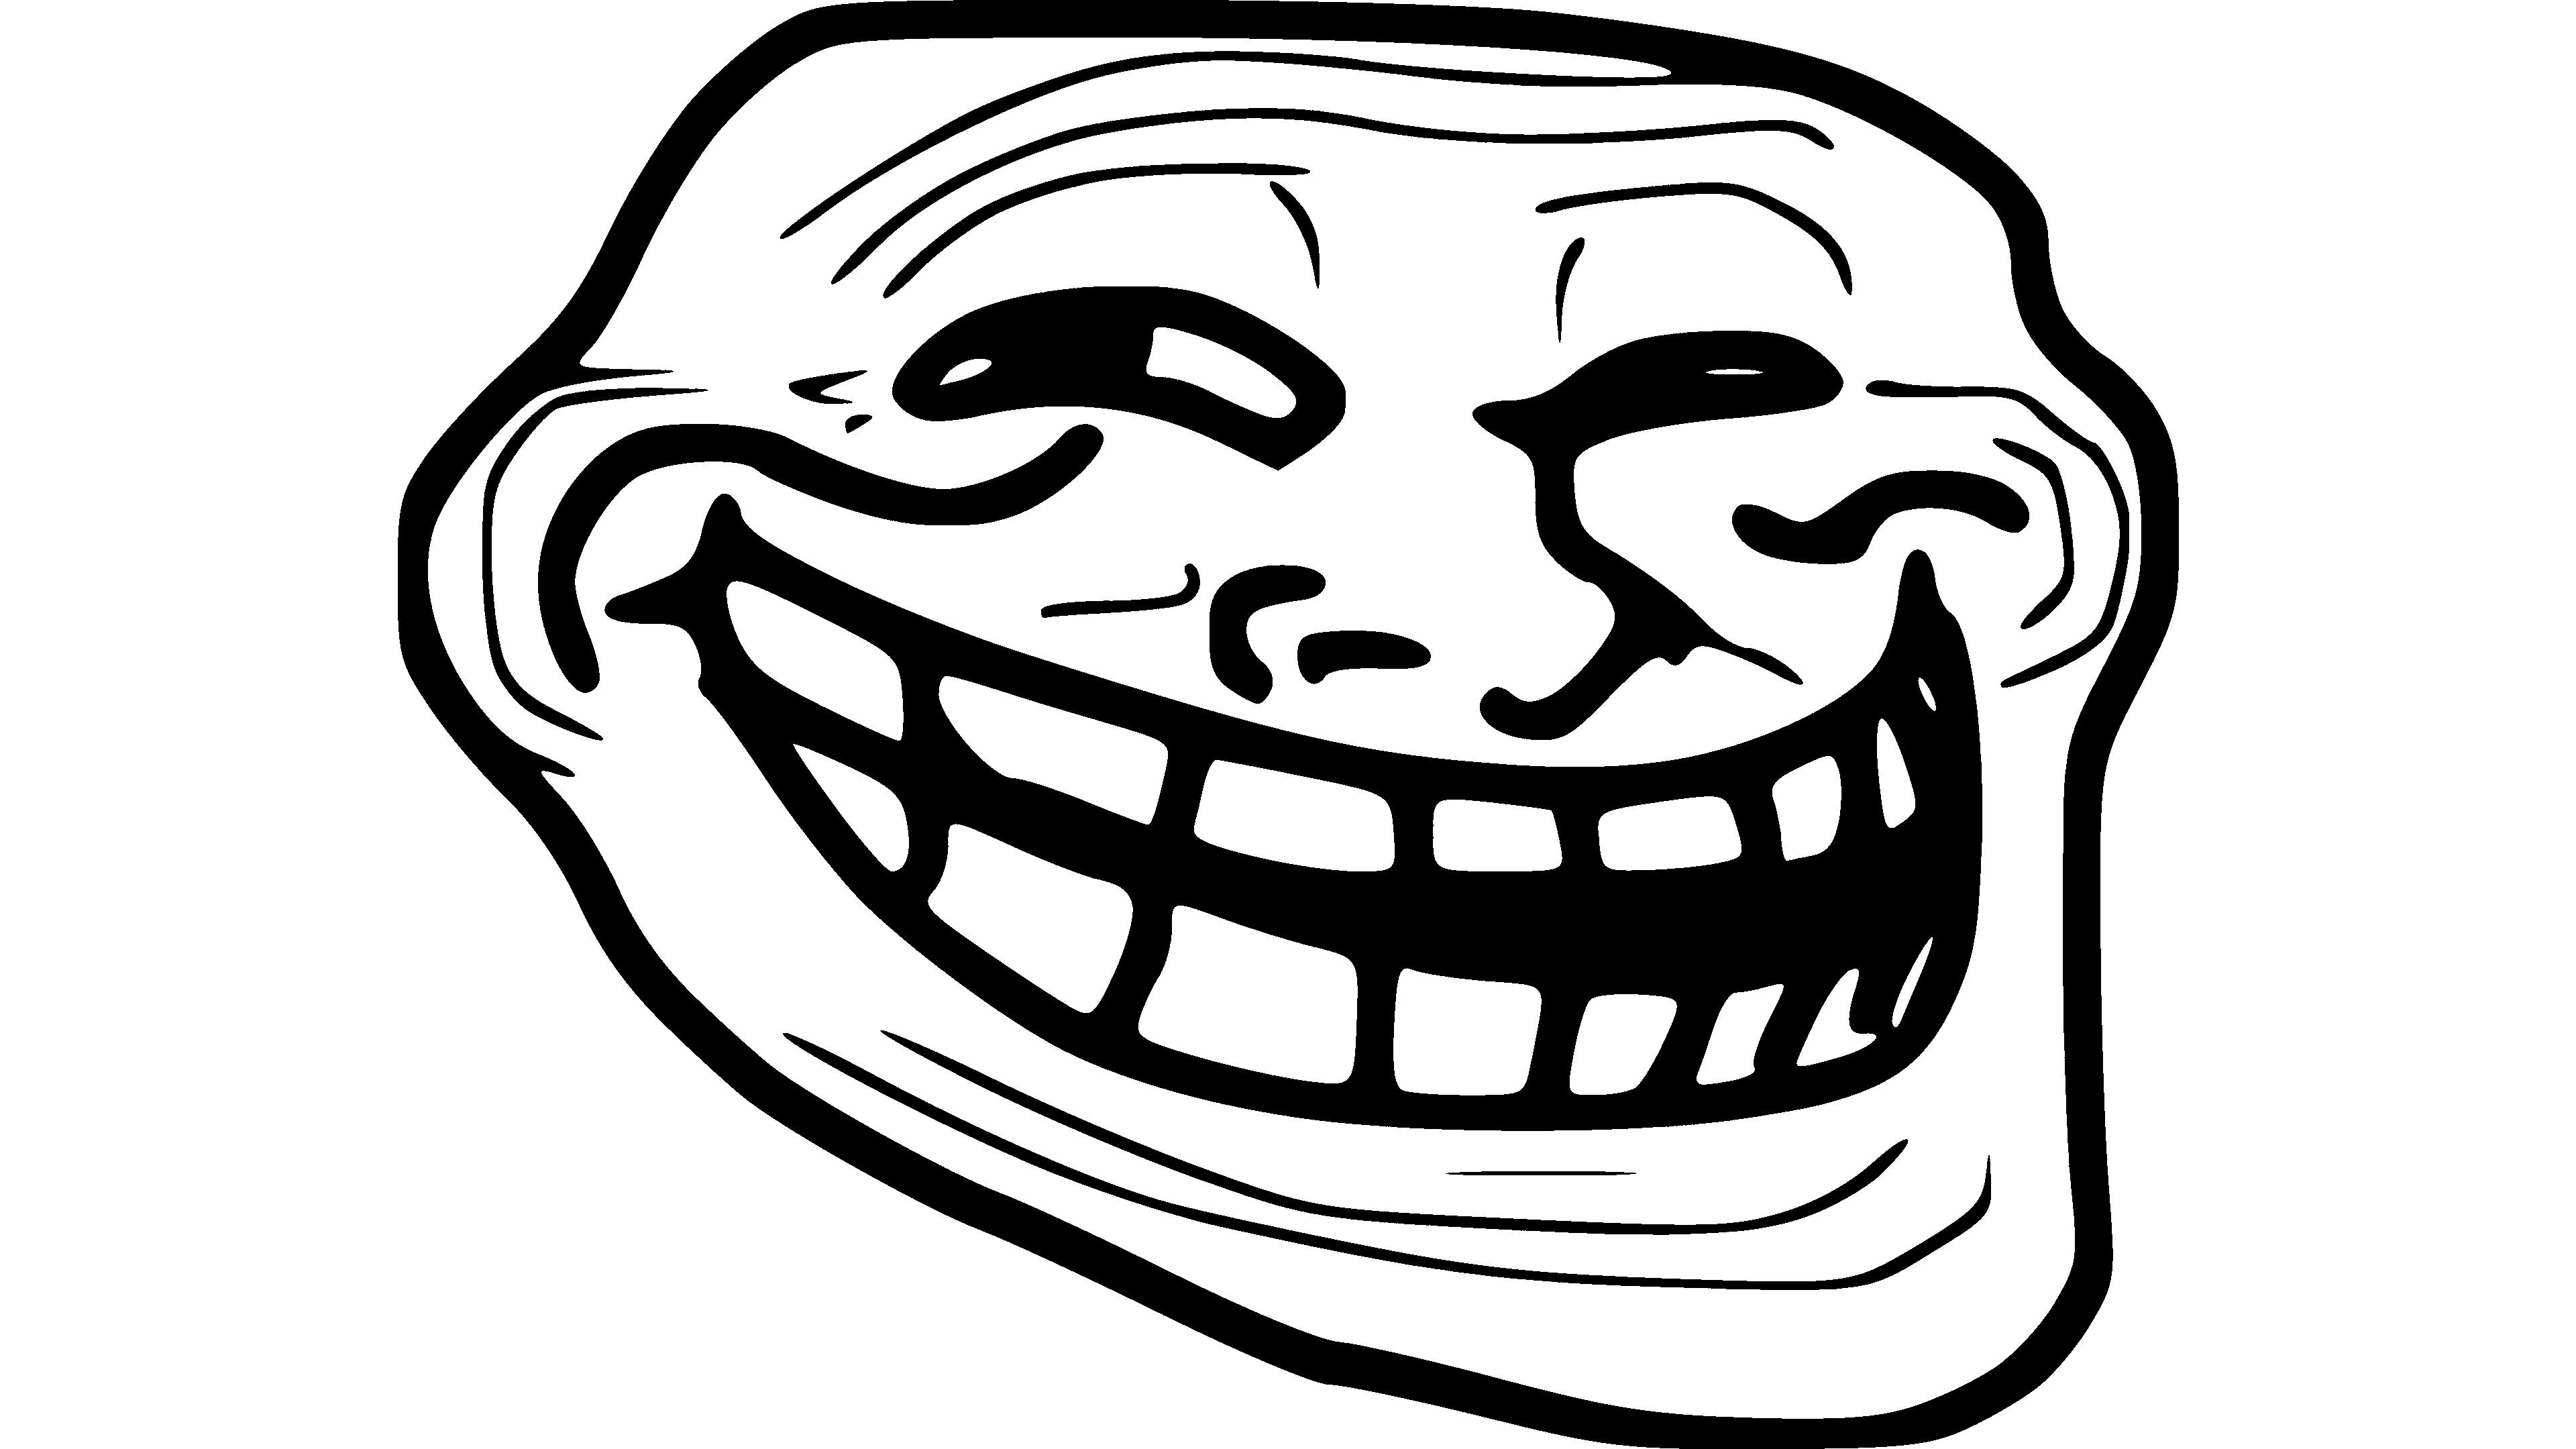

In [13]:
secret_img

### 2.- Escondiendo una nueva imagen

Es tu turno, ahora tu esconderás una imagen. Las instrucciones son las siguientes:

2.1 Selecciona una imagen de 2160 x 3840 pixeles (a.k.a resolución 4k), lo importante es que sea solo en blanco y negro, en la carpeta `images` se disponibiliza como ejemplo la imagen `black_and_white_example.jpg` y crea una variable llamada `my_img` leyendo la imagen seleccionada con `Image.open()`.

In [14]:
my_img = Image.open("images/imagen_escondida.png")

2.2 Crea un arreglo llamado `my_img_np` utilizando `my_img` y el método `np.array()`.
    * Es importante que `my_img_np.shape` sea `(2160, 3840)`, es decir, que solo sea de dos dimensiones. Esto porque es una imagen en blanco y negro, no necesitando el modelo RGB.

In [15]:
my_img_nw = my_img.convert("L")
my_img_np = np.array(my_img_nw)
print(my_img_np.shape)

(2160, 3840)


2.3 Crear la variable `my_img_np_aux` utilizando un _umbral_ con tal de que:
    - 1: Si el valor del pixel es mayor  al _umbral_.
    - 0: Si el valor del pixel es menor o igual al _umbral_.
    - El `dtype` debe ser `np.uint8`.
    - Para `black_and_white_example.jpg` un umbral adecuado es `20`.

In [16]:
umbral = 10
my_img_np_aux = (my_img_np > umbral).astype(np.uint8)

Puedes probar que tan bien quedó la imagen con la siguiente linea. Si crees que no se ve bien, puedes cambiar el _umbral_.

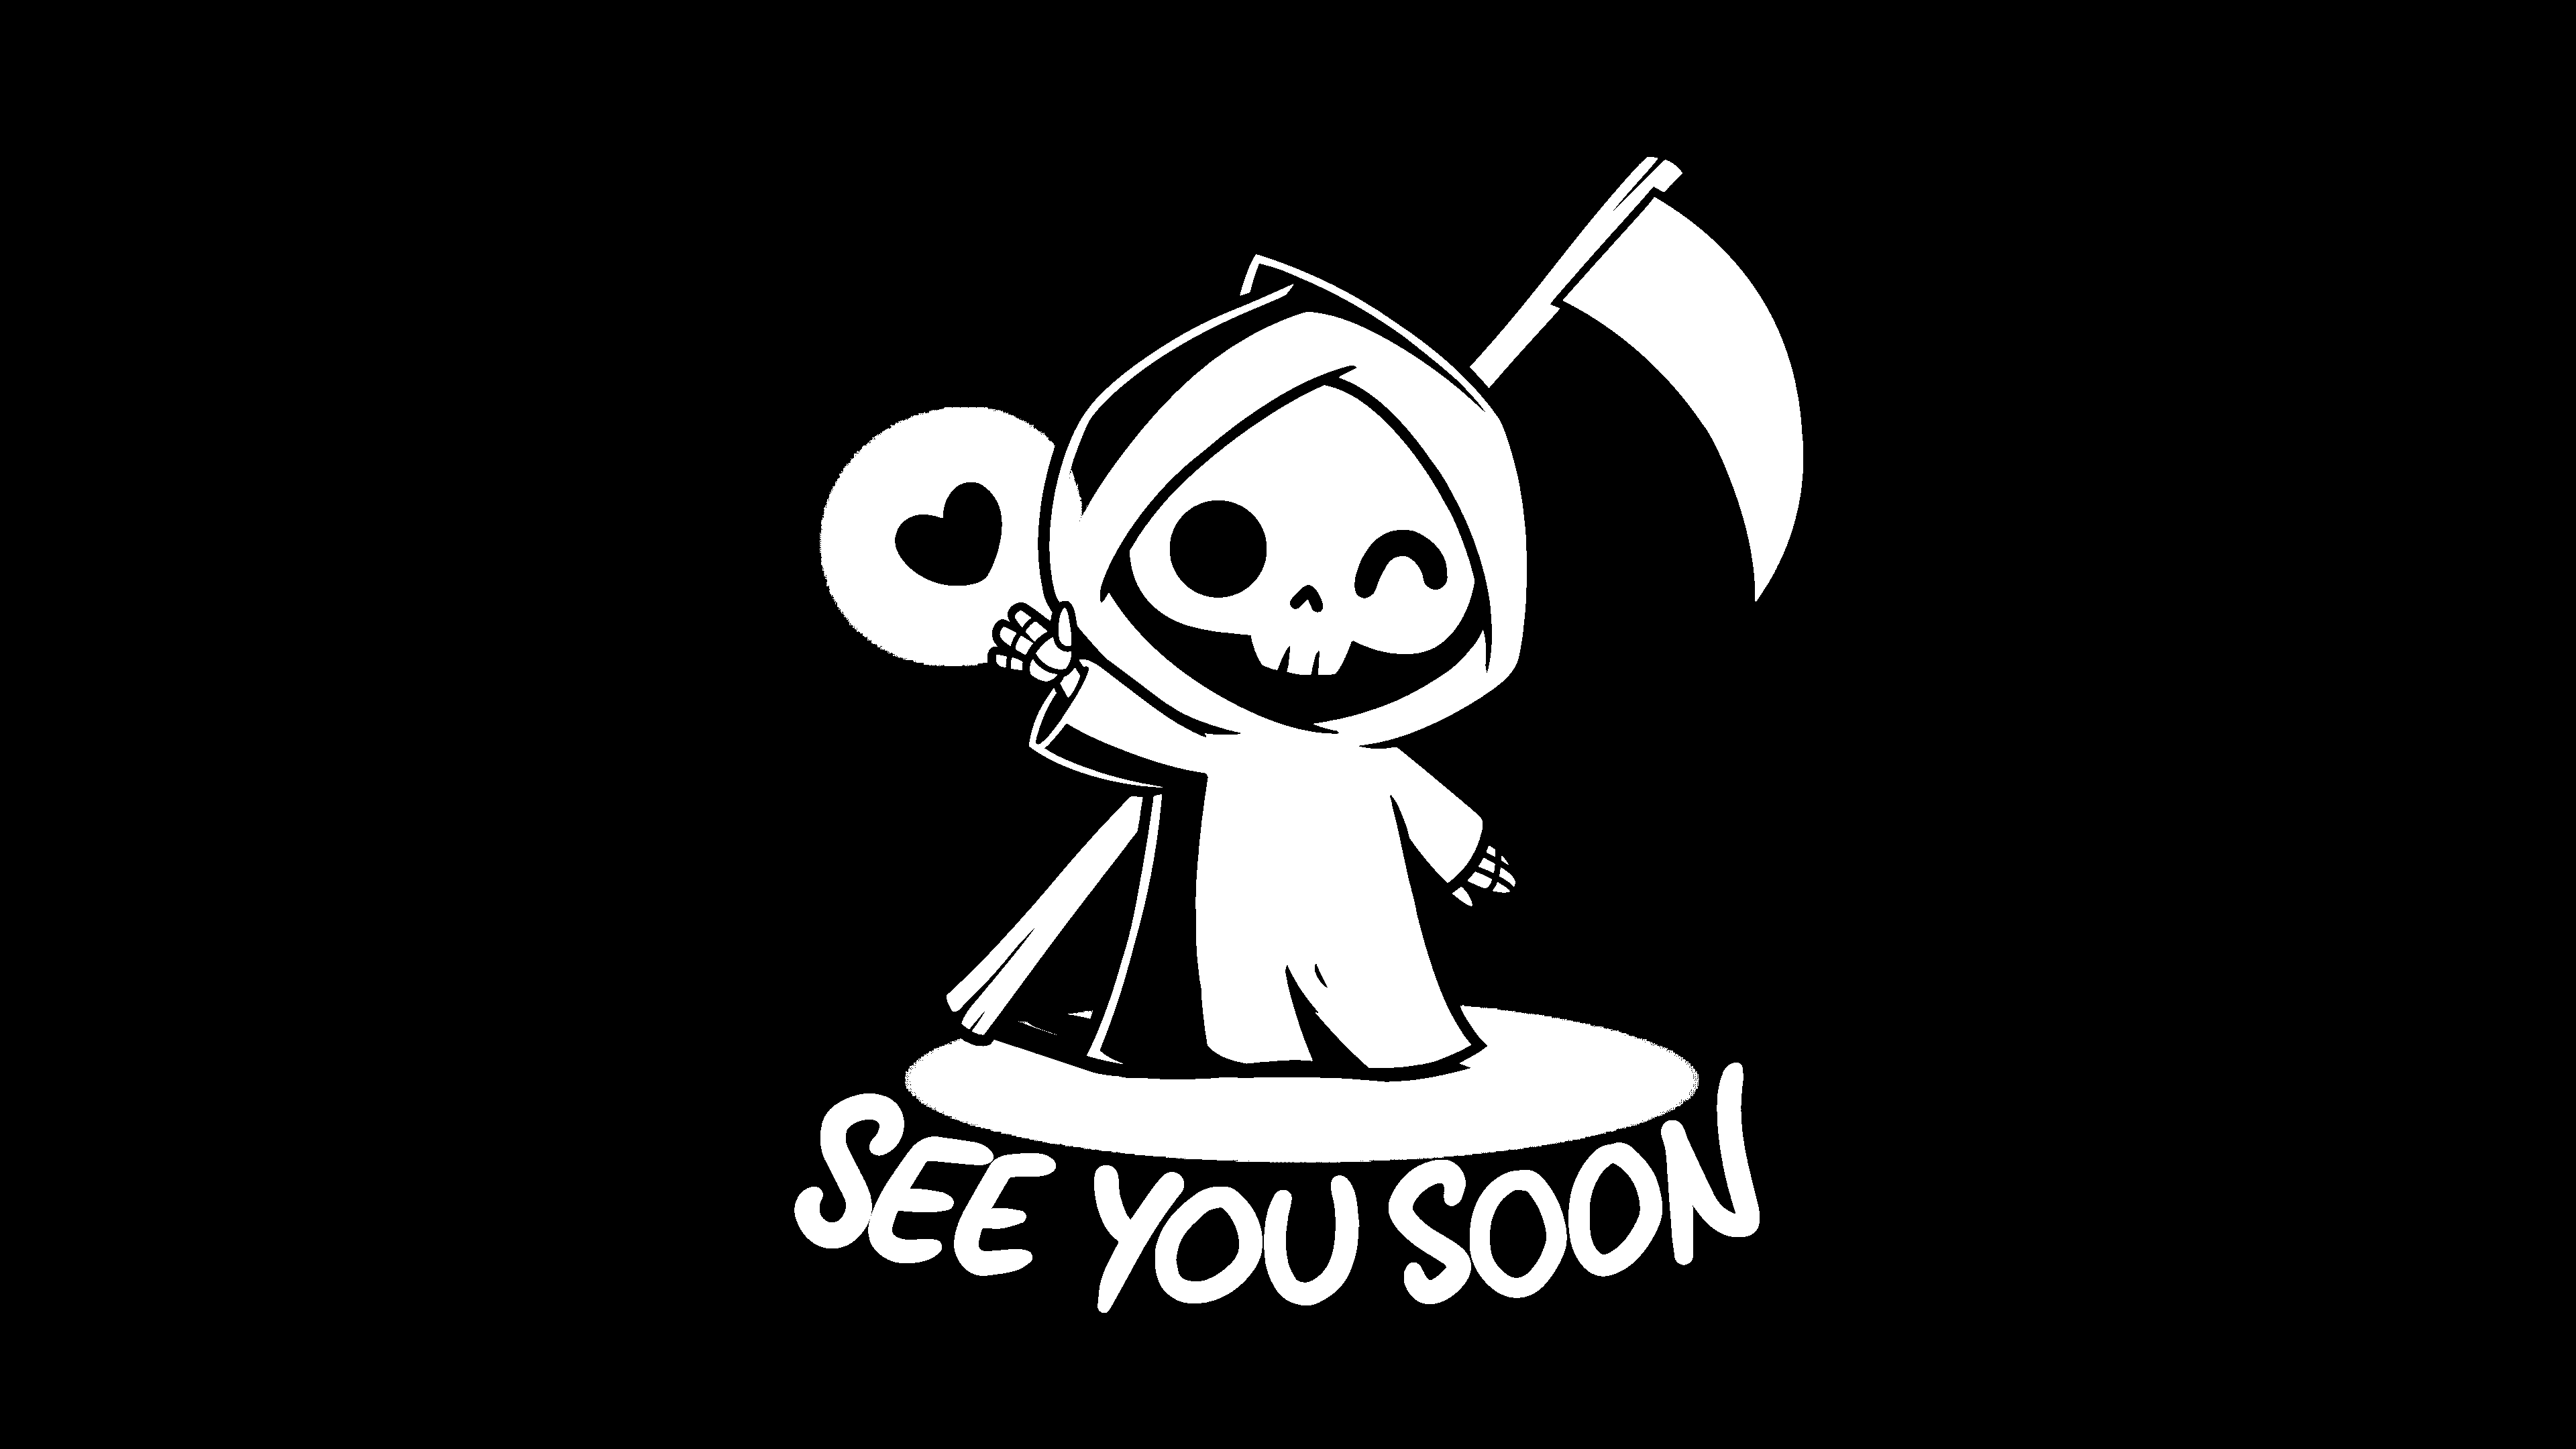

In [17]:
Image.fromarray(my_img_np_aux * 255)

2.4 Dividir la imagen en tres arreglos de tamaño (2160, 1280) y guardarlos en una lista con el nombre `my_img_split`. Hint: Revisa en la documentación de `numpy`.

In [18]:
my_img_split = np.array_split(my_img_np_aux, 3, axis=1)

Revisa utilizando la siguiente iteración.

In [19]:
for img_array in my_img_split:
    print(img_array.shape)

(2160, 1280)
(2160, 1280)
(2160, 1280)


2.5 La imagen donde se esconderá tu imagen selecionada está en la carpeta `images` con el nombre `gatito_original.png`, que sospechosamente es de 2160 x 1280 pixeles. Carga la imagen en la variable `cat` y luego crea arreglo `cat_np` utilizando `cat`. Verifica que `cat_np.shape = (2160, 1280, 3)`.

In [20]:
cat = Image.open("images/gatito_original.png")
cat_np = np.array(cat)
print(cat_np.shape)

(2160, 1280, 3)


2.6 Convierte todos los valores de `cat_np` a valores pares. Esto lo puedes hacer sumando 1 a cada valor de arreglo si es impar

In [21]:
cat_np = np.where(cat_np % 2 != 0, cat_np + 1, cat_np)
print(cat_np)

[[[178 210 214]
  [178 210 214]
  [178 208 214]
  ...
  [170 200 208]
  [170 200 208]
  [168 198 206]]

 [[180 212 216]
  [180 212 216]
  [180 210 216]
  ...
  [172 202 210]
  [172 202 210]
  [170 200 208]]

 [[178 210 214]
  [178 210 214]
  [180 210 216]
  ...
  [172 202 210]
  [172 202 210]
  [172 202 210]]

 ...

 [[124 178 190]
  [122 176 188]
  [128 182 194]
  ...
  [ 40  36  32]
  [ 42  38  34]
  [ 44  40  36]]

 [[126 180 192]
  [124 178 190]
  [126 180 192]
  ...
  [ 42  38  36]
  [ 42  38  36]
  [ 44  40  36]]

 [[124 178 190]
  [122 176 188]
  [122 176 188]
  ...
  [ 48  44  42]
  [ 44  40  36]
  [ 42  38  34]]]


2.7 Itera por canal RGB de `cat_np` y en cada capa suma los valores de uno de los arreglos de `my_img_split`.

In [22]:
for channel in range(cat_np.shape[2]):
    cat_np[:, :, channel] += my_img_split[channel]

2.8 Crea una variable llamada `cat_secret_im` con `Image.fromarray` y la variable `cat_np` (que ya ha sido modificada). Luego guarda la imagen en la carpeta `images` con el nombre `my_secret.png`.

In [23]:
cat_secret_im = Image.fromarray(cat_np)
cat_secret_im.save("images/my_secret.png")

In [79]:
cat_secret_im

Output hidden; open in https://colab.research.google.com to view.

2.9 Crea una función llamada `imagenception()` que como argumento tenga la ruta de la imagen que quieres descifrar y que descifre la imagen secreta recientemente creada. Hint: Utiliza todos los pasos de la primera parte.

In [24]:
def imagenception(filepath):
    secret_list = []
    img = Image.open(filepath)
    img_np = np.array(img)
    for channel in range(img_np.shape[2]):
        secret_aux = (img_np[:, :, channel] % 2)
        secret_aux = secret_aux * 255
        secret_aux = secret_aux.astype(np.uint8)
        secret_list.append(secret_aux)
    secret_np = np.concatenate(secret_list, axis=1)
    secret_img = Image.fromarray(secret_np, mode="L")
    return secret_img

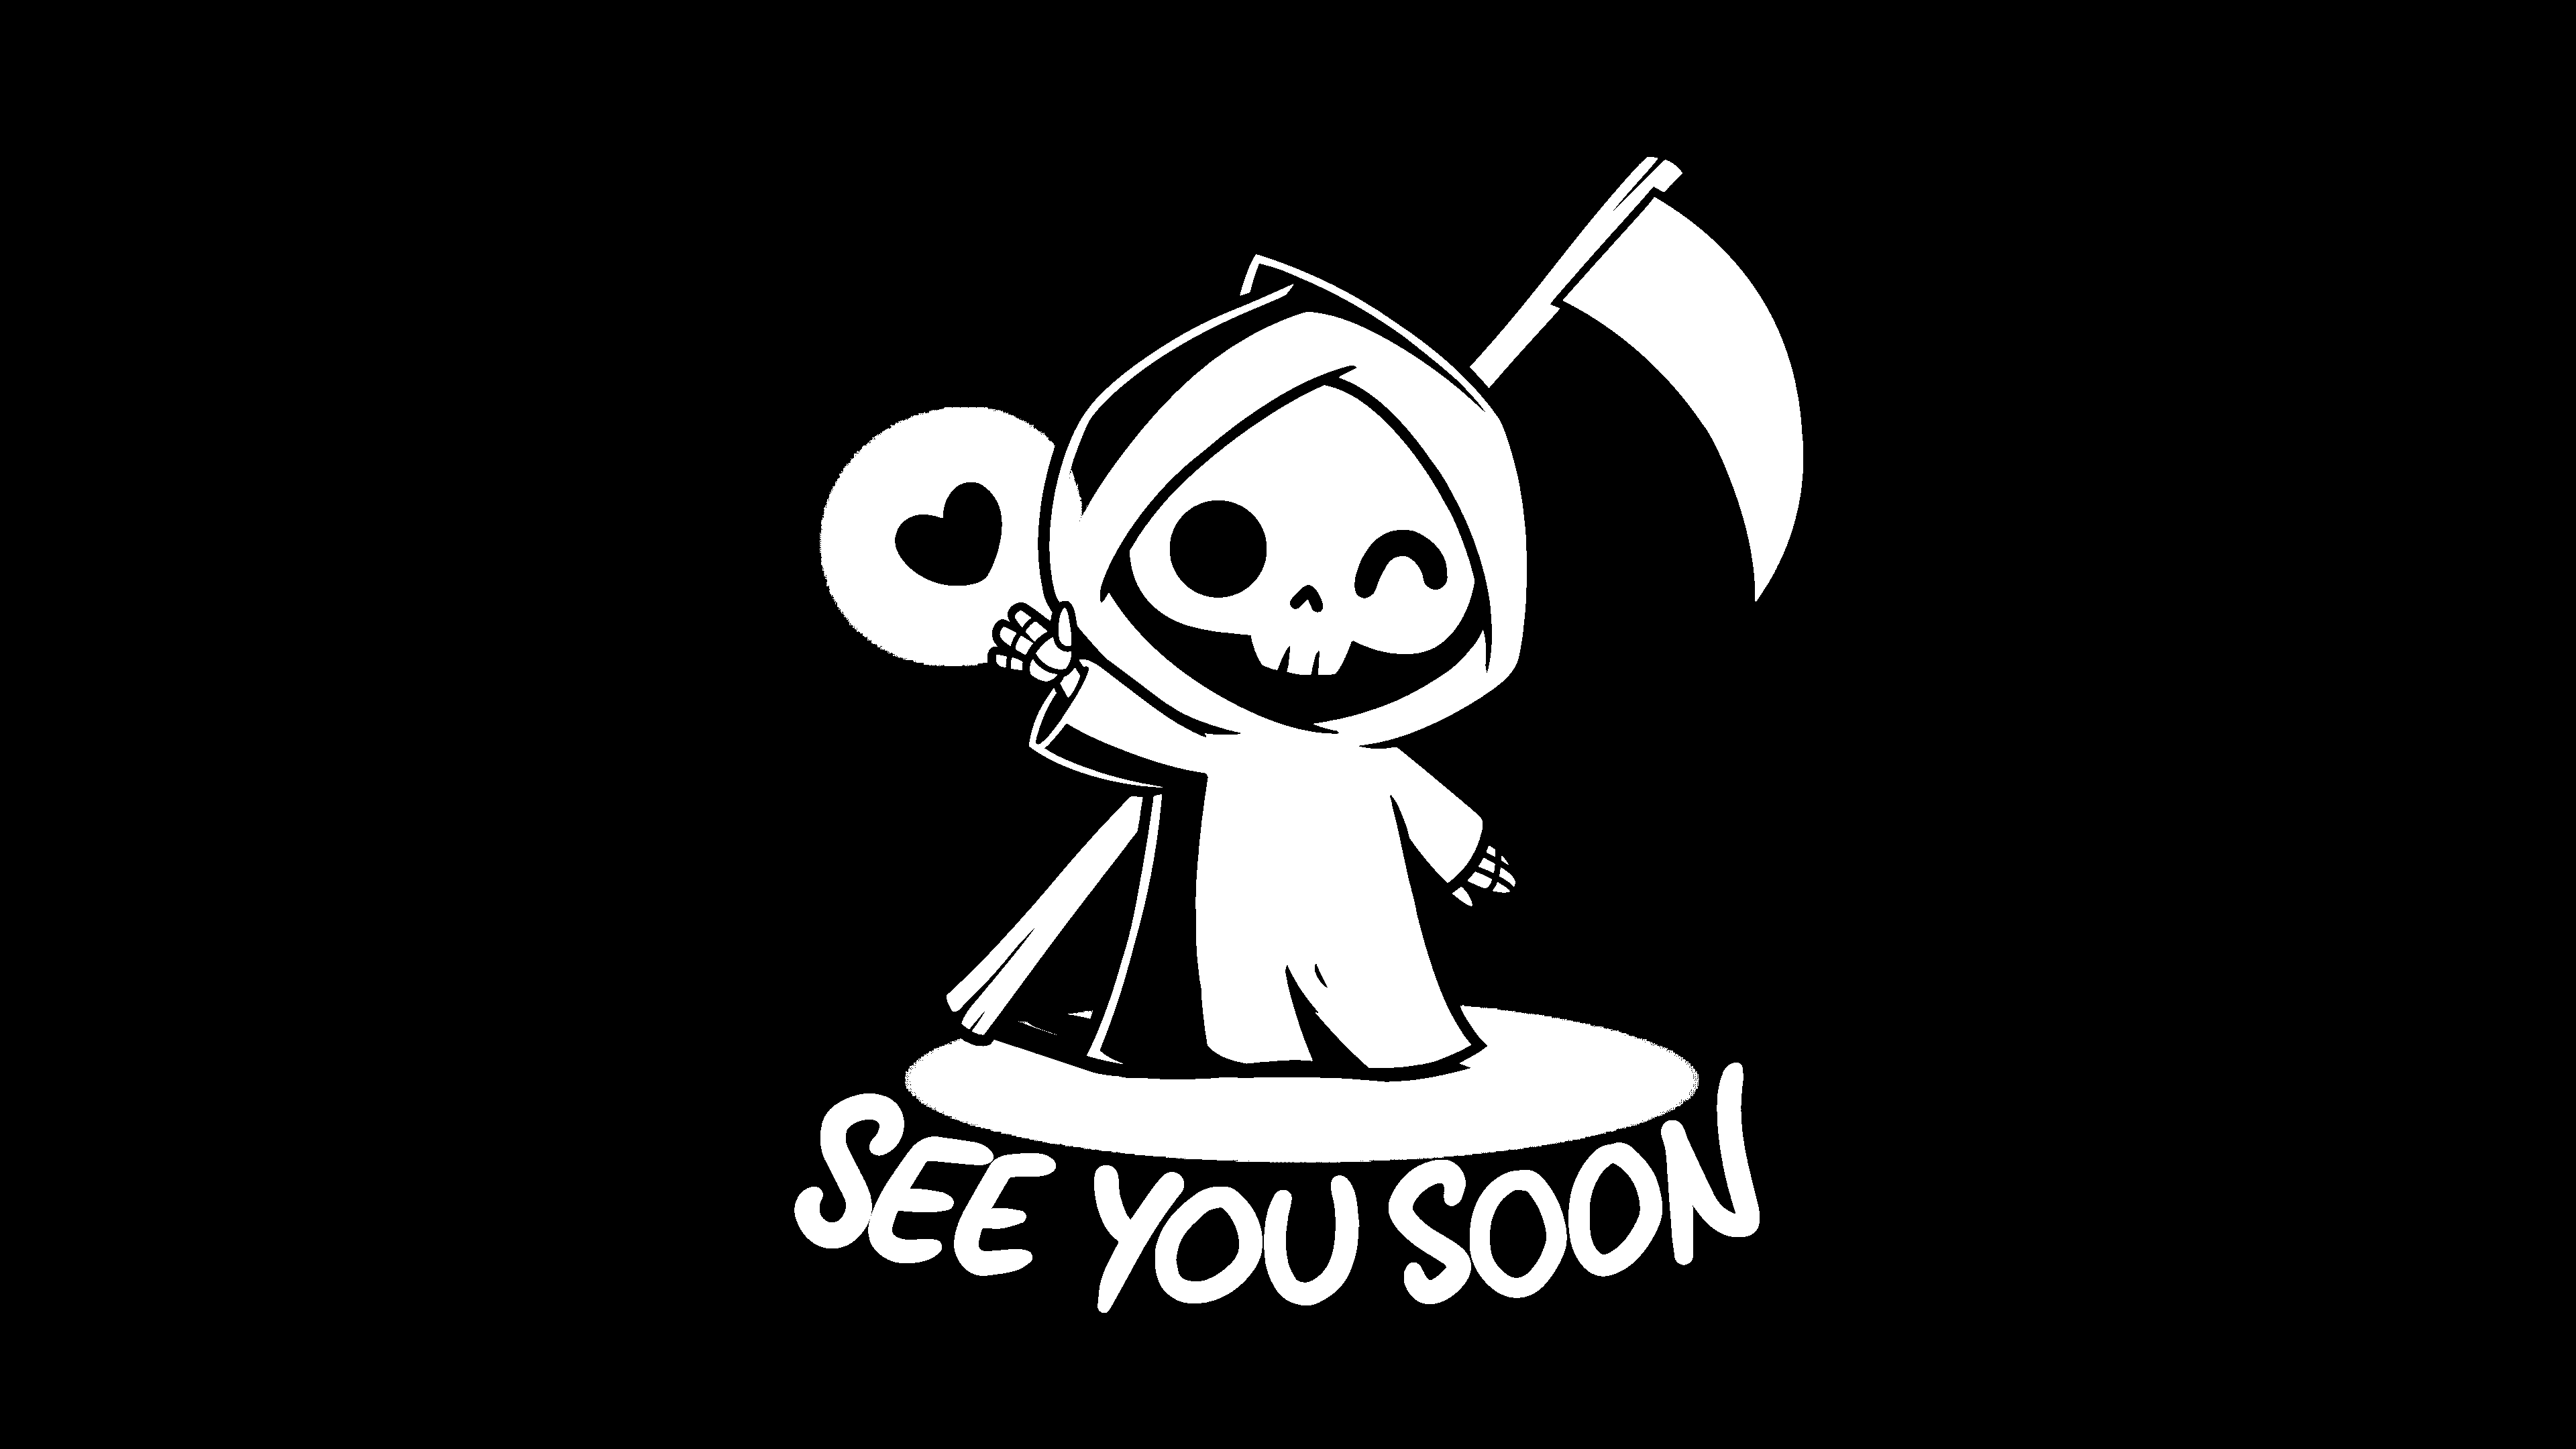

In [25]:
my_secret_img = imagenception("images/my_secret.png")
my_secret_img

## II.- Analizando la Felicidad

<img src="https://static01.nyt.com/images/2019/09/29/opinion/sunday/29HolsonStill/29HolsonStill-popup.jpg" width="480" height="360" align="center"/>

Este ejercicio es netamente análisis de datos, tratando de abarcar problemas típicos como la lectura de datos, corrección de errores, métricas agrupadas, unión de datos, etc. Utilizaremos un conjunto de datos llamado __World Happiness Report__ disponible en el siguiente [link](https://www.kaggle.com/unsdsn/world-happiness), de donde se puede obtener información al respecto.

#### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.


### 2.1 Lectura de datos

In [26]:
# libraries
import pandas as pd
pd.set_option("display.max_columns", 999)  # Permite mostrar hasta 999 columnas de un DataFrame en Jupyter.

En la carpeta `data/world-happiness` se disponen de tres archivos, uno por cada reporte anual (años 2015, 2016 y 2017). No es de sorprender que envíen un archivo por año (podría ser mensual, semestral, etc.), lo imortante es ser capaces de leer una cantidad __variable__ de archivos al mismo tiempo. Una buena práctica es crear un diccionario de dataframes.

In [27]:
# Comprehension dictionary
df_dict = {
    year: pd.read_csv(f"data/world-happiness/{year}.csv").assign(Year=year)
    for year in [2015, 2016, 2017]
}

Por ejemplo, se puede acceder al DataFrame asociado al archivo `data/world-happiness/2016.csv` de la siguiente manera:

Una pequeña descripción de las columnas

* `Country` Name of the country.
* `Region` Region the country belongs to.
* `Happiness Rank` Rank of the country based on the Happiness Score.
* `Happiness Score` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* `Standard Error` The standard error of the happiness score.
* `Economy (GDP per Capita)` The extent to which GDP contributes to the calculation of the Happiness Score.
* `Family` The extent to which Family contributes to the calculation of the Happiness Score
* `Health (Life Expectancy)` The extent to which Life expectancy contributed to the calculation of the Happiness Score
* `Freedom` The extent to which Freedom contributed to the calculation of the Happiness Score.
* `Trust (Government Corruption)` The extent to which Perception of Corruption contributes to Happiness Score.
* `Generosity` The extent to which Generosity contributed to the calculation of the Happiness Score.
* `Dystopia Residual` The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

Notar que los conjuntos de datos no poseen las mismas columnas, por lo tanto, solo se trabajarán con las columnas en común y posteriormente agregaremos el año con tal de concatenar los tres conjuntos.

In [78]:
# Función para normalizar los nombres de las columnas
def normalize_columns(df):
    df.columns = (
        df.columns
        .str.strip()                          # Eliminar espacios en blanco
        .str.lower()                          # Convertir a minúsculas
        .str.replace(' ', '_')                # Reemplazar espacios por guiones bajos
        .str.replace(r'\(|\)', '', regex=True)# Eliminar paréntesis
        .str.replace('.', '_')                # Reemplazar puntos por guiones bajos
        .str.replace('economy__gdp_per_capita_', 'economy_gdp_per_capita')
        .str.replace('health__life_expectancy_', 'health_life_expectancy')
        .str.replace('trust__government_corruption_', 'trust_government_corruption')
    )
    return df

# Normaliza las columnas para cada año
df_dict = {
    year: normalize_columns(pd.read_csv(f"data/world-happiness/{year}.csv").assign(Year=year))
    for year in [2015, 2016, 2017]
}

# Verificar las columnas normalizadas
for year, df in df_dict.items():
    print(f"Columnas normalizadas para el año {year}: {df.columns}")

Columnas normalizadas para el año 2015: Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual', 'year'],
      dtype='object')
Columnas normalizadas para el año 2016: Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'lower_confidence_interval', 'upper_confidence_interval',
       'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom',
       'trust_government_corruption', 'generosity', 'dystopia_residual',
       'year'],
      dtype='object')
Columnas normalizadas para el año 2017: Index(['country', 'happiness_rank', 'happiness_score', 'whisker_high',
       'whisker_low', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'generosity',
       'trust_government_corruption', 'dystopia_residual', 'year'],
      dtype='object')


In [30]:
from functools import reduce
intersection_columns = reduce(np.intersect1d, [df_i.columns.values for df_i in df_dict.values()]).tolist()
print(intersection_columns)

['country', 'dystopia_residual', 'economy_gdp_per_capita', 'family', 'freedom', 'generosity', 'happiness_rank', 'happiness_score', 'health_life_expectancy', 'trust_government_corruption', 'year']


Explica con tus palabras las operaciones que se realizaron para obtener la variable `intersection_columns`.

__Respuesta:__  En primer lugar '[df_i.columns.values for df_i in df_dict.values()]' entrega una lista de arrays con los nombres de las columnas de todos los Dataframes, luego se utiliza la función reduce para eliminar las columnas repetidas en los Dataframes y, por último, se utiliza '.tolist() para entregar el resultado como una lista de python (no como array NumPy). Además se realizó una normalización de los nombres de las columnas de los años 2015, 2016 y 2017 pues existían columnas que representaban los mismos datos pero se perdían al momento de usar reduce() debido a que los nombres no eran los mismos.

### 2.2 Concatenación y procesado

Define el DataFrame `happiness` tal que:

* Sea la concatenación de los dataframes de `df_dict`
* Resetea los índices.
* Selecciona solo las columnas de la lista `intersection_columns`.
* Los nombres de las columnas deben estar en minísculas, reemplazar espacios por guiones bajos (`_`) y elimina los paréntesis.


In [32]:
# Concatenar los DataFrames de df_dict y resetear los índices
happiness = pd.concat(df_dict.values()).reset_index(drop=True)

# Seleccionar solo las columnas de la lista intersection_columns
happiness = happiness[intersection_columns]

# Normalizar los nombres de las columnas
happiness.columns = (
    happiness.columns.str.lower()                  # Pasar a minúsculas
    .str.replace(" ", "_")                         # Reemplazar espacios por guiones bajos
    .str.replace(r"\(|\)", "", regex=True)         # Eliminar los paréntesis
)

happiness.head()

,country,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,happiness_rank,happiness_score,health_life_expectancy,trust_government_corruption,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,0.48357,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,0.36503,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,0.32957,2015


### 2.3 Análisis

Como siempre, partimos con un análisis descriptivo simple.

In [33]:
happiness.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,470,166,Switzerland,3,,,,,,,
dystopia_residual,470.0,,,,2.092717,0.565772,0.32858,1.737975,2.09464,2.455575,3.83772
economy_gdp_per_capita,470.0,,,,0.92783,0.415584,0.0,0.605292,0.995439,1.252443,1.870766
family,470.0,,,,0.990347,0.318707,0.0,0.793,1.025665,1.228745,1.610574
freedom,470.0,,,,0.402828,0.150356,0.0,0.297615,0.418347,0.51685,0.66973
generosity,470.0,,,,0.242241,0.131543,0.0,0.152831,0.22314,0.315824,0.838075
happiness_rank,470.0,,,,78.829787,45.281408,1.0,40.0,79.0,118.0,158.0
happiness_score,470.0,,,,5.370728,1.136998,2.693,4.509,5.2825,6.23375,7.587
health_life_expectancy,470.0,,,,0.579968,0.240161,0.0,0.402301,0.630053,0.768298,1.02525
trust_government_corruption,470.0,,,,0.13479,0.111313,0.0,0.059777,0.099502,0.173161,0.55191


¿Cuántos países no tienen mediciones de felicidad en los tres años del estudio? ¿Cuáles son?

In [34]:
# Agrupar por país y contar cuántas veces aparece cada uno
country_counts = happiness.groupby('country').size()

# Filtrar los países que no tienen mediciones en los tres años
countries_missing_data = country_counts[country_counts < 3]

# Mostrar cuántos países no tienen mediciones en los tres años
print(f"{len(countries_missing_data)}")

20


In [35]:
# Mostrar los países
print(countries_missing_data.index.tolist())

['Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Hong Kong', 'Hong Kong S.A.R., China', 'Laos', 'Lesotho', 'Mozambique', 'Namibia', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland Region', 'Somaliland region', 'South Sudan', 'Suriname', 'Swaziland', 'Taiwan', 'Taiwan Province of China']


__Respuesta__: Hay 20 países que no tienen mediciones de felicidad en los 3 años de estudio y corresponden a: Belize, Central African Republic, Comoros, Djibouti, Hong Kong, Hong Kong S.A.R., China, Laos, Lesotho, Mozambique, Namibia, Oman, Puerto Rico, Somalia, Somaliland Region, Somaliland region, South Sudan, Suriname, Swaziland, Taiwan, Taiwan Province of China

Note que la lista de países proveniente de la pregunta anterior tiene errores de consistencia, por ejemplo están los registros de `Hong Kong` y `Hong Kong S.A.R., China` que escencialmente son el mismo. Lo mismo ocurre con `Taiwan` y `Somaliland Region`.

Modifique la columna `country` del dataframe `happiness` con tal de reparar los errores de `Hong Kong`, `Taiwan` y `Somaliland Region`.

In [38]:
# Corrección de errores
country_correct = {
    "hong kong s.a.r., china": "hong kong",
    "hong kong": "hong kong",
    "taiwan province of china": "taiwan",
    "taiwan": "taiwan",
    "somaliland region": "somaliland"
}

# Normalizar la columna 'country' y aplicar las correcciones
happiness['country'] = happiness['country'].str.lower().str.strip().replace(country_correct)
happiness['country'] = happiness['country'].str.title()

Luego de la modificación, ¿Cuántos países no tienen mediciones en los tres años de estudio?

In [39]:
# Agrupar por país y contar cuántas veces aparece cada uno
country_counts = happiness.groupby('country').size()

# Filtrar los países que no tienen mediciones en los tres años
countries_missing_data = country_counts[country_counts < 3]

# Mostrar cuántos países no tienen mediciones en los tres años
print(f"{len(countries_missing_data)}")

15


In [40]:
print(countries_missing_data.index.tolist())

['Belize', 'Central African Republic', 'Comoros', 'Djibouti', 'Laos', 'Lesotho', 'Mozambique', 'Namibia', 'Oman', 'Puerto Rico', 'Somalia', 'Somaliland', 'South Sudan', 'Suriname', 'Swaziland']


Pivotea el dataframe `happines` tal que los índices sean los años, las columnas los países y el valor su `happiness_score`. LLena los valores nulos con un _string_ vacío `""`. Un país no puede tener más de un registro por año, por lo que puedes utilizar directamente el médoto `pd.DataFrame.pivot()`.


In [41]:
# Pivoteo del DataFrame
happiness_pivoted = happiness.pivot(index='year', columns='country', values='happiness_score')

# Llenar los valores nulos con un string vacío
happiness_pivoted = happiness_pivoted.fillna("")

print(happiness_pivoted)

country  Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  \
year                                                                            
2015           3.575    4.959    5.605   4.033      6.574    4.350      7.284   
2016           3.360    4.655    6.355   3.866      6.650    4.360      7.313   
2017           3.794    4.644    5.872   3.795      6.599    4.376      7.284   

country  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium Belize  \
year                                                                         
2015       7.200       5.212    5.960       4.694    5.813    6.937          
2016       7.119       5.291    6.218       4.643    5.802    6.929  5.956   
2017       7.006       5.234    6.087       4.608    5.569    6.891  5.956   

country  Benin  Bhutan  Bolivia  Bosnia And Herzegovina  Botswana  Brazil  \
year                                                                        
2015     3.340   5.253    5.890                  

¿Qué información podrías sacar rápidamente de esta tabla pivoteada? ¿Podrías decir que siempre es útil pivotear una tabla?

__Respuesta:__  En primer lugar, se puede observar como ha cambiado la felicidad de cada país a lo largo del tiempo, se puede comparar la felicidad entre los países (cuales son los que tienen mayor o menor índice de felicidad). Además se pueden identificar rápidamente los valores nulos o faltantes. Es batante útil pivotear una tabla, pues la información es fácil de visualizar, resumir y comparar.

En promedio, ¿Cuáles son los tres países con el mayor _score_ de felicidad?

In [42]:
# Convertir los valores a tipo numérico
happiness_pivoted = happiness_pivoted.apply(pd.to_numeric, errors='coerce')

# Calcular el promedio de los scores por país
happiness_scores = happiness_pivoted.mean()

# Mostramos el top 3 con el mayor puntaje de felicidad
top_3 = happiness_scores.nlargest(3)
print(top_3)

country
Switzerland    7.530
Denmark        7.525
Iceland        7.522
dtype: float64


__Respuesta:__  Los países con mayor score de felicidad son: Suiza, Dinamarca e Islandia.

Calcula el promedio anual de todas las columnas factores de felicidad, es decir, todas las variables numéricas excepto `happiness_score` y `happiness_rank`.

In [44]:
# Seleccionamos todads las columnas con varibles numéricas excepto 'happiness_score', 'happiness_rank'
factor_cols = happiness.select_dtypes(include=np.number).columns.difference(['happiness_score', 'happiness_rank','year'])

# Calculamos el promedio anual de todas las columnas
avg_annual_factors = happiness.groupby('year')[factor_cols].mean()

# Mostramos el resultado
print(avg_annual_factors)

      dystopia_residual  economy_gdp_per_capita    family   freedom  \
year                                                                  
2015           2.098977                0.846137  0.991046  0.428615   
2016           2.325807                0.953880  0.793621  0.370994   
2017           1.850238                0.984718  1.188898  0.408786   

      generosity  health_life_expectancy  trust_government_corruption  
year                                                                   
2015    0.237296                0.630259                     0.143422  
2016    0.242635                0.557619                     0.137624  
2017    0.246883                0.551341                     0.123120  


Respecto al cálculo anterior, para cada uno de los años, ¿Cuál es el factor que más contribuye (en promedio) al _score_ de la felicidad y en qué medida?

In [77]:
# Encontrar el factor que más contribuye al score de felicidad en cada año (máximo)
max_contributors = avg_annual_factors.idxmax(axis=1)
max_values = avg_annual_factors.max(axis=1)

# Crear un DataFrame con los resultados
result = pd.DataFrame({
    'Factor': max_contributors,
    'Valor': max_values
})

print(result)

                 Factor     Valor
year                             
2015  dystopia_residual  2.098977
2016  dystopia_residual  2.325807
2017  dystopia_residual  1.850238


__Respuesta:__  Como se puede observar el factor que más contribuye al score de felicidad es 'dystopia_residual', esto tiene sentido pues es un valor que asocia el contexto social y económico del país para agregarle un peso negativo a la felicidad a nivel region.

### 2.4 Agregando más datos

A continuación, agregaremos un nuevo conjunto de datos, el que contiene estadísticas de suicidio por años, países y rangos etáreos. Se encuentra disponible en el siguiente [link](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [46]:
suicide = pd.read_csv("data/suicide_rates.csv")
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


La mayoría de las columnas son autoexplicativas.
* `country`
* `year`
* `sex`
* `age`
* `suicides_no`
* `population`
* `suicides/100k pop`
* `country-year`
* `HDI for year` Human Development Index
* `gdp_for_year ($)` Gross Domestic Product
* `gdp_per_capita ($)`
* `generation` based on age grouping average

Un poco de estadística descriptiva.

In [47]:
suicide.describe(include="all").fillna("").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,,,,,,,
year,27820.0,,,,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,,,,,,,
age,27820,6,15-24 years,4642,,,,,,,
suicides_no,27820.0,,,,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,,,,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides/100k pop,27820.0,,,,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Albania1987,12,,,,,,,
HDI for year,8364.0,,,,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"2,156,624,900",12,,,,,,,


Crea un nuevo DataFrame llamado suicide_agg siguiendo las siguientes instrucciones:

* Agrupa por país y año.
* Suma la población y el número de suicidios.
* Resetea los índices.
* Agrega una nueva columna llamada `suicides_ratio_100k` formada por la división de `suicides_no` y `population`, para posteriormente muliplicarla por 100,000.
* Agrega una nuevale columna llamada `suicides_rank` similar a `happiness_rank`, es decir, que asigne un orden __por año__ a cada país según la columna `suicides_ratio_100k` tal que el rank 1 corresponda al que tenga mayor `suicides_ratio_100k`. Hint: Usa el método `rank()`.

In [49]:
# Es posible hacer todas las operaciones encadenadas!
suicides_agg = (
    suicide.groupby(["country", "year"])
    .agg(suicides_no=("suicides_no", "sum"),
         population=("population", "sum")
    )
    .reset_index()
    .assign(
        suicides_ratio_100k=lambda x: x["suicides_no"] / x["population"] * 100_000,
        suicides_rank=lambda x: x.groupby("year")["suicides_ratio_100k"].rank(ascending=False, method="min")
    )
)
suicides_agg.head()

,country,year,suicides_no,population,suicides_ratio_100k,suicides_rank
0,Albania,1987,73,2709600,2.694125,44.0
1,Albania,1988,63,2764300,2.279058,47.0
2,Albania,1989,68,2803100,2.425886,47.0
3,Albania,1992,47,2822500,1.665190,61.0
4,Albania,1993,73,2807300,2.600363,59.0


Crea un nuevo DataFrame con el nombre `hap_sui` al unir `happiness` y `suicides_agg` tal que coincidan país y año, quédate con solo los registros que coincidan en ambas DataFrames.

In [50]:
hap_sui = pd.merge(happiness, suicides_agg, on=["country", "year"], how="inner")
hap_sui.head()

,country,dystopia_residual,economy_gdp_per_capita,family,freedom,generosity,happiness_rank,happiness_score,health_life_expectancy,trust_government_corruption,year,suicides_no,population,suicides_ratio_100k,suicides_rank
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015,1073,7892502,13.595182,22.0
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015,40,308554,12.963695,24.0
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,0.48357,2015,564,5383060,10.477312,31.0
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,0.36503,2015,590,4882909,12.082961,26.0
4,Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6,7.406,0.88911,0.41372,2015,731,5181797,14.107075,18.0


¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank`?

In [51]:
hap_sui.loc[:, ["happiness_rank", "suicides_rank"]].corr(method="pearson")

,happiness_rank,suicides_rank
happiness_rank,1.000000,0.038896
suicides_rank,0.038896,1.000000


¿Qué tipo de correlación lineal hay entre las variables `happiness_rank` y `suicides_rank` por cada año?

In [52]:
hap_sui.groupby("year")[["happiness_rank", "suicides_rank"]].corr(method="pearson")

happiness_rank  suicides_rank
year                                              
2015 happiness_rank        1.000000       0.101215
     suicides_rank         0.101215       1.000000
2016 happiness_rank        1.000000       0.022048
     suicides_rank         0.022048       1.000000

__Respuesta:__  En ambos gráficos se muestra que hay una muy baja correlación lineal entre las variables (pues el valor es cercano a 0), en el año en que se muestra una mayor correlación es en el 2015 pero aún así esta no es significativa. Se esperaría una correlación negativa dado a que tendemos a relacionar la felicidad y el suicidio como conceptos opuestos, es decir, a mayor aumento de uno mayor disminución del otro y viceversa, pero esto no es los mostrado por los datos donde no hay una correlación clara.

¿La respuesta de las dos preguntas anteriores cambia si se utilizan las variables `happiness_score` y `suicides_ratio_100k`?

In [53]:
hap_sui.groupby("year")[["happiness_score", "suicides_ratio_100k"]].corr(method="pearson")

happiness_score  suicides_ratio_100k
year                                                          
2015 happiness_score             1.000000             0.035262
     suicides_ratio_100k         0.035262             1.000000
2016 happiness_score             1.000000             0.025924
     suicides_ratio_100k         0.025924             1.000000

__Respuesta:__  En este caso tampoco se observa una correlación lineal dado que el valor es cercano a 0.

### III.- Índices de Costos de Vida

<img src="https://i.pinimg.com/originals/e7/dd/38/e7dd3861c4d30a2826515a8861300db7.png" width="480" height="360" align="center"/>

Estos índices están ajustados a la Ciudad de Nueva York (NYC). Lo que significa que para la Ciudad de Nueva York, cada índice debería marcar 100(%). Si otra ciudad tiene, por ejemplo, un índice de alquiler de 120, significa que en esa ciudad se paga de media por el alquiler un 20% más que en Nueva York. Si una ciudad tiene un índice de alquiler de 70, significa que en esa ciudad los alquileres son de media un 30% más baratos que en Nueva York.

* El Índice de Costo de Vida (Sin Alquiler) es un indicador relativo de los precios de bienes de consumo, incluyendo comestibles, restaurantes, transporte y servicios. El Índice de Costo de Vida no incluye gastos de residencia como alquileres o hipotecas. Si una ciudad tiene un Costo de Vida de 120, significa que Numbeo estima que es un 20% más cara que Nueva York (sin contar alquiler).

* El Índice de Alquiler es una estimación de precios de alquiler de apartamentos de una ciudad comparada con Nueva York. Si el Índice de Alquiler es 80, Numbeo estima que el precio de los alquileres en esa ciudad es de media un 20% más barato que en Nueva York.

* El Índice de Comestibles es una estimación de los precios de la compra de una ciudad en comparación con Nueva York. Para calcular esta sección, Numbeo utiliza el peso de los artículos en la sección "Mercados" por cada ciudad.

* El Índice de Restaurantes es una comparación de precios de comidas y bebidas en bares y restaurantes en comparación con NY.

* El Índice de Costo de Vida más Alquiler es una estimación de precios de consumo incluyendo alquiler en comparación con la Ciudad de Nueva York.

* El Poder Adquisitivo Local muestra la capacidad adquisitiva relativa a la hora de comprar bienes y servicios en una ciudad determinada, con relación al salario medio de la ciudad. Si el poder adquisitivo doméstico es 40, significa que los habitantes de dicha ciudad con salario medio pueden permitirse comprar una media de 60% menos bienes y servicios que los habitantes de Nueva York con salario medio.

Para más información sobre los pesos utilizados (fórmula completa) puedes visitar: [motivación y metodología](https://es.numbeo.com/coste-de-vida/motivaci%C3%B3n-y-metodolog%C3%ADa).

Para comenzar es necesario instalar el paquete `lxml` en tu entorno virtual de conda para poder descargar los datos. Basta con ejecutar:

In [68]:
# instalar lxml
!pip install lxml

Se disponibiliza a continuación la carga de datos de un dataframe.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [70]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
life_cost = (
    pd.concat(
        {
            year: (
                pd.read_html(f"https://www.numbeo.com/cost-of-living/rankings.jsp?title={year}")[1]
                .rename(columns=lambda x: x.lower().replace(" ", "_"))
                .assign(rank=lambda x: x.index + 1)
                .set_index("rank")
            ) for year in years
        }
    )
    .rename_axis(["year", "rank"])
    .reset_index()
)
life_cost.head()

,year,rank,city,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,2015,1,"Hamilton, Bermuda",163.6,120.0,142.3,191.7,132.9,69.8
1,2015,2,"Geneva, Switzerland",145.2,81.5,114.0,161.1,141.2,130.2
2,2015,3,"Caracas, Venezuela",141.4,60.5,101.9,155.2,122.3,9.7
3,2015,4,"Zurich, Switzerland",141.1,66.4,104.6,148.6,146.9,133.9
4,2015,5,"Tromso, Norway",131.4,55.8,94.5,127.7,137.1,132.4


### Ejercicio 3.1

Explique lo que se hizo en la celda anterior detalladamente.

###Respuesta:
 En primer lugar se define una lista con diferentes años que serán utilizados para recorrer un dataframe. Luego se define la variable life_cost como una concatenación de los DataFrames de cada año. Para obtener los dataframe de cada año se usa un ciclo for en donde cada iteración hace lo siguiente:
 - pd.read_html: lee todas las tablas html de la web numbeo y devuelve una lista con los dataframes.
 - .rename: renombra las columnas del DataFrame escribiendo todo en minúsculas y reemplazando los espacios con "_".
 - .assing: se crea una nueva columna llamada rank en donde se le asigna un numero basado en su posición de indice y se le suma 1 para que empiece desde el 1.
 - set_index: establece como número de indice a la columna rank.
 - for year in years: se crea un diccionario donde cada clave es el año del dataframe.

 Además se cambian los nombres de los indices a year y rank y se resetean los indices. Por último se muestra la información creada con .head().

### Ejercicio 3.2

Genera un histograma del índice del costo de vida (sin alquiler) para cada año (es decir, 6 histogramas).

¿Qué conclusión puedes sacar de estos gráficos?

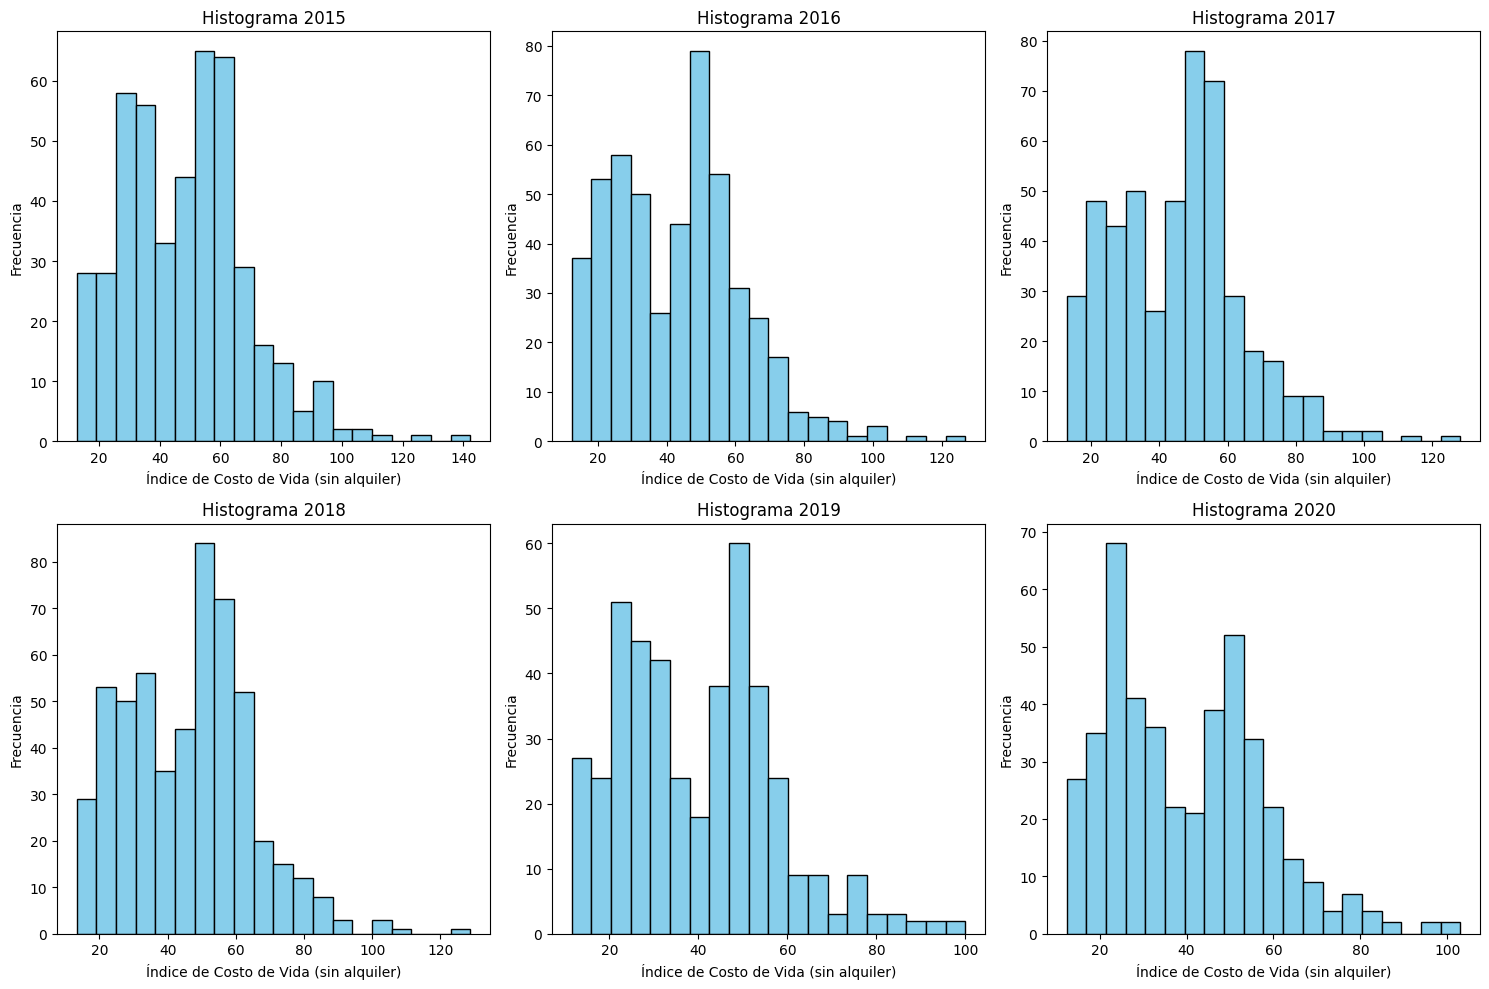

In [71]:
# Filtrar por año y generar un histograma para cada año
years = [2015, 2016, 2017, 2018, 2019, 2020]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, year in enumerate(years):
    ax = axes[i // 3, i % 3]
    data = life_cost[life_cost['year'] == year]['cost_of_living_plus_rent_index']
    ax.hist(data, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f"Histograma {year}")
    ax.set_xlabel("Índice de Costo de Vida (sin alquiler)")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

###Respuesta:
Podemos ver una clara tendencia de un indice de costo de vida al reddor del 50 y del 30, además podemos notar que las tendencias se mantienen a lo largo de los años y no varían demasiado. También se puede apreciar que un indice de costo de vida superior al 80 es muy infrecuente.

### Ejercicio 3.3

Grafica el índice de restaurantes a través de los años para diez ciudades escogidas pseudo-aleatoriamente (variable `my_cities` de la celda siguiente) en un mismo gráfico. Recuerda escoger el tipo de gráfico adecuadamente.

¿Ves alguna relación? ¿Qué podrías decir del gráfico? ¿Por qué no graficar todas las ciudades en lugar de solo escoger algunas?

In [72]:
rol_seed = 201910513  # Escribe tu rol UTFSM sin número verificador
my_cities = life_cost["city"].drop_duplicates().sample(n=10, random_state=rol_seed).values

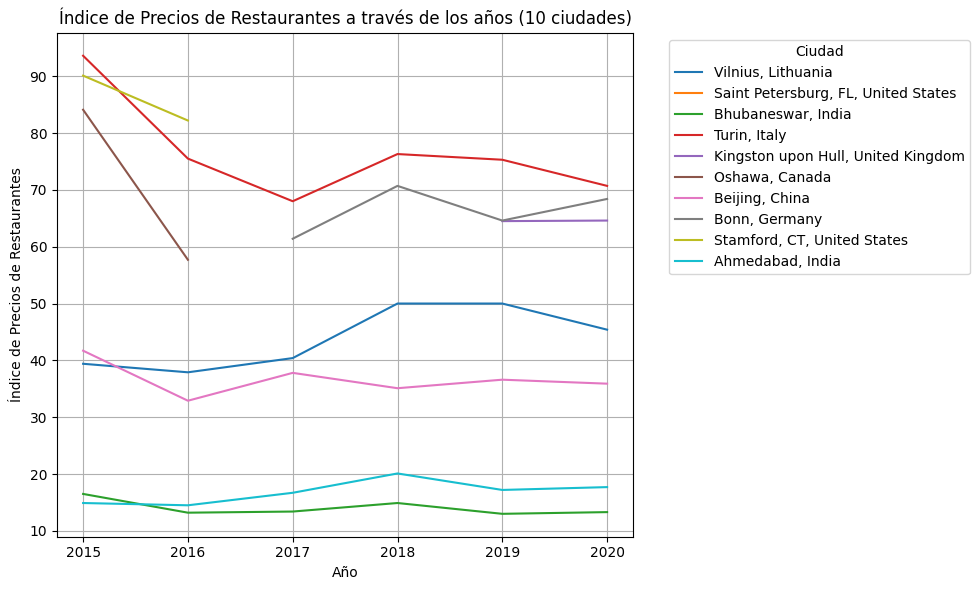

In [76]:
# Filtrar el DataFrame para obtener solo las ciudades seleccionadas
filtered_life_cost = life_cost[life_cost["city"].isin(my_cities)]

# Graficar el índice de restaurantes
plt.figure(figsize=(10, 6))

# Graficar por cada ciudad
for city in my_cities:
    city_data = filtered_life_cost[filtered_life_cost["city"] == city]
    plt.plot(city_data["year"], city_data["restaurant_price_index"], label=city)

# Etiquetas y leyenda
plt.title("Índice de Precios de Restaurantes a través de los años (10 ciudades)")
plt.xlabel("Año")
plt.ylabel("Índice de Precios de Restaurantes")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

###Respuesta:
La mayoría de restaurantes mantienen indice de precios estable a lo largo de los años, a excepción de Italia , Canada y Estados Unidos que los primeros años tiene una baja significativa.

Además, del grafico se puede decir que las ciudades de europa y norte america muestran tener un indice de precios alto y similar, al igual que las ciudades de China y Lithuania que son un poco mas bajos que las anteriores y tambien se observa una similaridad en las ciudades de la india que son significativamente mas bajos quer las demas ciudades.

Por último, si graficáramos todas las ciudades en el mismo gráfico sería difícil identificar patrones y tendencias individuales entre las ciudades, ya que se estorbarían las lineas entre si. Por esto es mejor optar por una muestra mas reducida y simplificada, tal que las ciudades escogidas representen a su Región de origen y se pueda analizar de mejor forma el problema.

